# Verificaction of $cos^{2}$ Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Angular_Acceptance as aa
from tqdm import tqdm

In [15]:
N_MUONS = int(5e6)
NUM_BINS = 58
n = 2
theta =  aa.sample_theta_cosn(N_MUONS,n,"rejection")

Sampling θ with cos^2(θ) [rejection]: 100%|██████████| 5000000/5000000 [00:00<00:00, 6097462.19it/s]


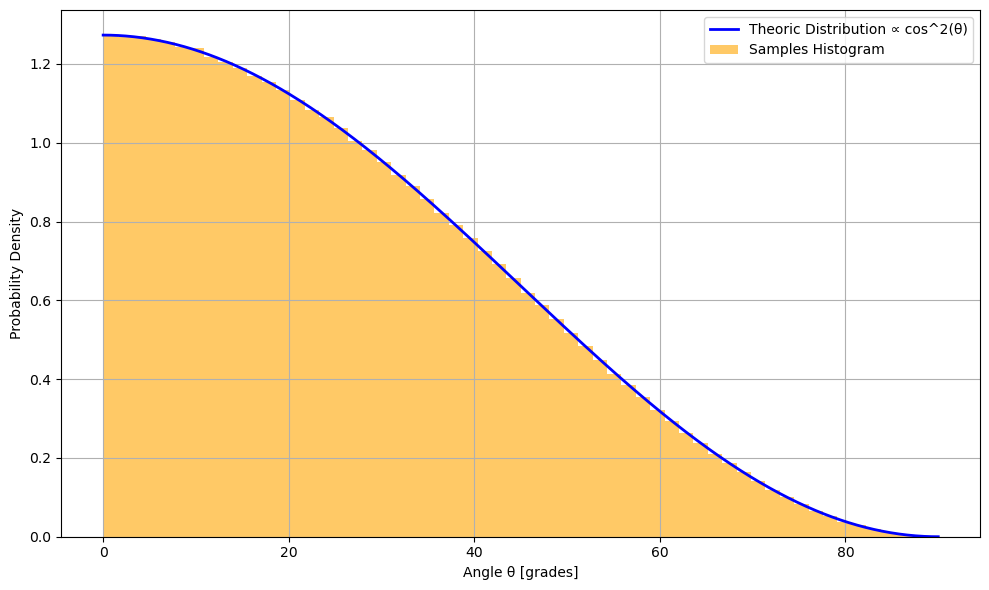

In [16]:
counts, bins = np.histogram(theta, bins=NUM_BINS, range=(0, np.pi/2), density=True)
bin_centers_rad = 0.5 * (bins[:-1] + bins[1:])
bin_centers_deg = np.rad2deg(bin_centers_rad)

theta_vals = np.linspace(0, np.pi/2, 1000)
pdf = np.cos(theta_vals)**n
pdf /= np.trapz(pdf, theta_vals) # Normalization

plt.figure(figsize=(10, 6))
plt.bar(bin_centers_deg, counts, width=np.rad2deg(bins[1]-bins[0]), alpha=0.6,
        label='Samples Histogram', color='orange')
plt.plot(np.rad2deg(theta_vals), pdf, 'b-', linewidth=2, label=f'Theoric Distribution ∝ cos^{n}(θ)')
plt.xlabel('Angle θ [grades]')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
